# First Keras Notebook

An attempt to recreate the network in tests.ipynb except sorting by tag so we have 3 less possible outputs, and including a no-tag option

In [6]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="6"
import ptetaphi_nn
import tools
with open("filepath.txt", 'r') as f:
    filename = f.read()

Load ntuple, get the data we need from the file

In [7]:
s_table = tools.open_file(filename, sort_by="tag")

sorting data by tag


In [8]:
# filter by realistic situation where we have 3 tags and 3 or 4 jets.
# ignore the case where there may be >4 since those are pretty rare
nb4 = (s_table.nbjets == 3) | (s_table.nbjets == 4) # 3 or 4 b-jets exist
nt3 = s_table.nbtags==3  # 3 b tags
nb4nt3 = nb4 & nt3
events = s_table[nb4nt3]
print(len(events))

# and ensure that the 3 tags are actually correct
# this results in very little event loss
events = events[events.truth[:,0] == 1]
events = events[events.truth[:,1] == 1]
events = events[events.truth[:,2] == 1]
print(len(events))

308955
303925


cutoff and pad for nn compatibility

In [9]:
cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_29 (Dense)             (None, 700)               15400     
_________________________________________________________________
dense_30 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_34 (Dense)             (None, 8)                

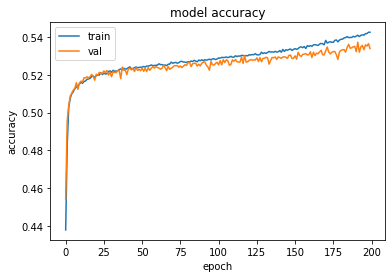

In [14]:
import importlib
importlib.reload(ptetaphi_nn)
nn = ptetaphi_nn.PtEtaPhiNN(events)
nn.learn()

using data given when this model was created


100%|██████████| 60785/60785 [00:00<00:00, 127538.96it/s]


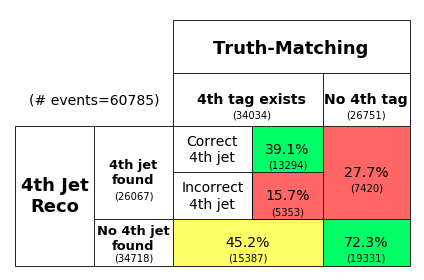

In [15]:
nn.evaluate(savename="first_nn")